In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_graphviz
import graphviz
import mglearn
from matplotlib.colors import ListedColormap

In [3]:
# データ入力
train = pd.read_csv("../inputs/train.csv")
test = pd.read_csv("../inputs/test.csv")
train = train.dropna(how='any')

In [4]:
# stratify は層化という意味で、訓練データと検証データの正解ラベルの比率を揃えてくれる
x_train, x_val, y_train, y_val = train_test_split(train[['Age', 'Pclass']], train["Survived"], random_state=0, stratify=train["Survived"])

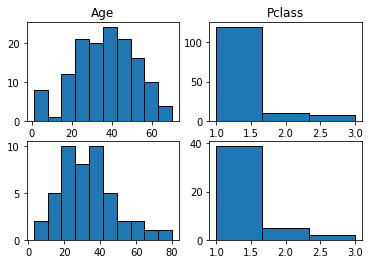

In [5]:
# データの説明変数の分布確認
AGE_BINS = 10
P_CLASS_BINS = 3
fig = plt.figure(figsize=(6, 4))
# train(above)
ax01 = fig.add_subplot(221)
ax01.hist(x_train["Age"], bins=AGE_BINS, histtype='barstacked', ec='black')
ax01.set_title('Age')
ax02 = fig.add_subplot(222)
ax02.hist(x_train["Pclass"], bins=P_CLASS_BINS, histtype='barstacked', ec='black')
ax02.set_title('Pclass')
# validation(below)
ax03 = fig.add_subplot(223)
ax03.hist(x_val["Age"], bins=AGE_BINS, histtype='barstacked', ec='black')
ax04 = fig.add_subplot(224)
ax04.hist(x_val["Pclass"], bins=P_CLASS_BINS, histtype='barstacked', ec='black')
plt.show()

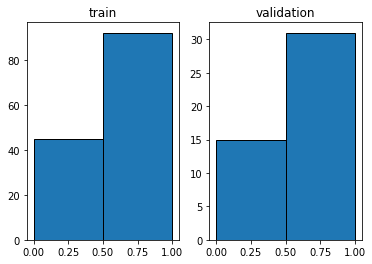

In [6]:
# データの目的変数の分布確認
SURVIVED_BINS = 2
fig = plt.figure(figsize=(6, 4))
# train(above)
ax01 = fig.add_subplot(121)
ax01.hist(y_train, bins=SURVIVED_BINS, histtype='barstacked', ec='black')
ax01.set_title('train')
ax02 = fig.add_subplot(122)
ax02.hist(y_val, bins=SURVIVED_BINS, histtype='barstacked', ec='black')
ax02.set_title('validation')
plt.show()

In [7]:
x_train.iloc[:, 0]

269    35.0
445     4.0
230    35.0
137    37.0
498    25.0
       ... 
645    48.0
699    42.0
218    32.0
701    35.0
394    24.0
Name: Age, Length: 137, dtype: float64

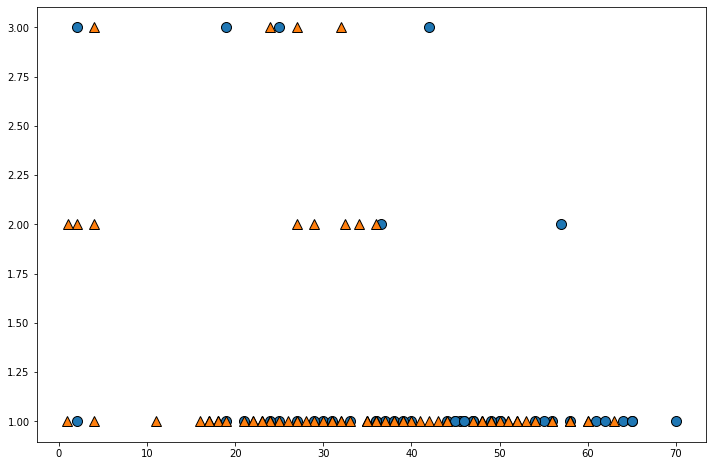

In [8]:
# 分布の可視化（x: age, y: pclass)
plt.figure(figsize=(12, 8))
mglearn.discrete_scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], y_train)
plt.show()

In [23]:
# 決定木の導入（適当に学習させてみた）
clf_model = DecisionTreeClassifier(max_depth=5)
clf_model.fit(x_train, y_train)
print(clf_model.score(x_val, y_val))

0.6304347826086957


In [24]:
# 可視化
dot_data = export_graphviz(clf_model)
graph = graphviz.Source(dot_data)
graph.render('titanic', format='png')

'titanic.png'

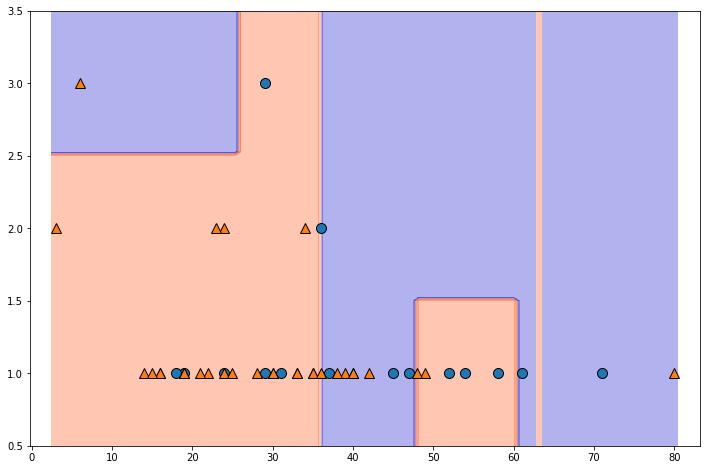

In [25]:
# 分類後のモデルを可視化（検証データに対して）
plt.figure(figsize=(12, 8))
_x1 = np.linspace(x_val.iloc[:, 0].min() - 0.5, x_val.iloc[:, 0].max() + 0.5, 100)
_x2 = np.linspace(x_val.iloc[:, 1].min() - 0.5, x_val.iloc[:, 1].max() + 0.5, 100)
x1, x2 = np.meshgrid(_x1, _x2)
X_stack = np.hstack((x1.ravel().reshape(-1, 1), x2.ravel().reshape(-1, 1)))
y_pred = clf_model.predict(X_stack).reshape(x1.shape)
custom_cmap = ListedColormap(['mediumblue', 'orangered'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
mglearn.discrete_scatter(x_val.iloc[:, 0], x_val.iloc[:, 1], y_val)
plt.show()

In [26]:
clf_model

NameError: name 'clf_model' is not defined